In [3]:
import pandas as pd

# Load the dataset 
file_path = "C:/Users/balla/Downloads/metaverse_transactions_dataset.csv/metaverse_transactions_dataset.csv"
data = pd.read_csv(file_path)


In [4]:
print(data.head())

             timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

 

In [5]:
print("Data info:", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB
Data info: None


In [6]:
print("Description:", data.describe())

Description:         hour_of_day        amount     ip_prefix  login_frequency  \
count  78600.000000  78600.000000  78600.000000     78600.000000   
mean      11.532634    502.574903    147.644430         4.178702   
std        6.935897    245.898146     69.388143         2.366038   
min        0.000000      0.010000     10.000000         1.000000   
25%        6.000000    331.319966    172.000000         2.000000   
50%       12.000000    500.029500    172.160000         4.000000   
75%       18.000000    669.528311    192.000000         6.000000   
max       23.000000   1557.150905    192.168000         8.000000   

       session_duration    risk_score  
count      78600.000000  78600.000000  
mean          69.684606     44.956722  
std           40.524476     21.775365  
min           20.000000     15.000000  
25%           35.000000     26.250000  
50%           60.000000     40.000000  
75%          100.000000     52.500000  
max          159.000000    100.000000  


In [7]:
print(data.isnull().sum())

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64


In [8]:
print(data.duplicated().sum())

0


In [9]:
print(data["timestamp"].dtype)

object


In [10]:
data["timestamp"] = pd.to_datetime(data["timestamp"], errors="coerce")
print(data["timestamp"].isna().sum())

0


In [11]:
print(data[data['timestamp'].isna()])


Empty DataFrame
Columns: [timestamp, hour_of_day, sending_address, receiving_address, amount, transaction_type, location_region, ip_prefix, login_frequency, session_duration, purchase_pattern, age_group, risk_score, anomaly]
Index: []


In [12]:
print(data['transaction_type'].unique())
print(data['location_region'].unique())
print(data['purchase_pattern'].unique())
print(data['age_group'].unique())
print(data['anomaly'].unique())


['transfer' 'purchase' 'sale' 'phishing' 'scam']
['Europe' 'South America' 'Asia' 'Africa' 'North America']
['focused' 'high_value' 'random']
['established' 'veteran' 'new']
['low_risk' 'moderate_risk' 'high_risk']


In [13]:
data.to_excel('Cleaned_Metaverse_Transactions_Dataset.xlsx', index=False, engine='openpyxl')
print("Cleaned dataset saved as 'Cleaned_Metaverse_Transactions_Dataset.xlsx'.")

Cleaned dataset saved as 'Cleaned_Metaverse_Transactions_Dataset.xlsx'.


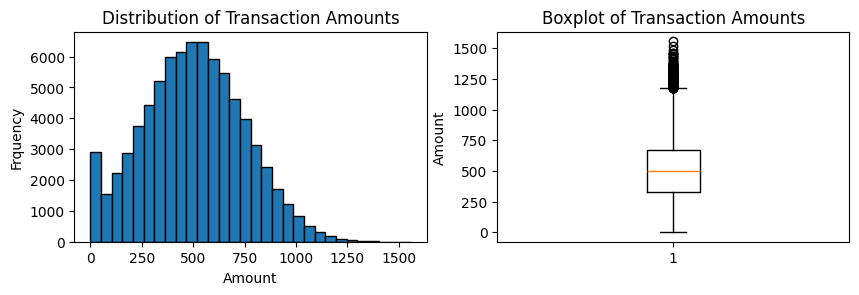

In [14]:
import matplotlib.pyplot as plt

# Histogram for "amount"
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(data["amount"], bins=30, edgecolor="black")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frquency")

plt.subplot(2, 2, 2)
plt.boxplot(data["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.ylabel("Amount")
plt.show()

In [15]:
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
                 timestamp  hour_of_day  \
118   2022-10-18 22:45:55           22   
143   2022-02-14 01:14:16            1   
185   2022-08-21 01:51:11            1   
265   2022-08-14 12:49:16           12   
281   2022-03-08 07:58:44            7   
...                   ...          ...   
78060 2022-10-15 15:26:47           15   
78071 2022-05-31 02:39:37            2   
78246 2022-01-29 12:06:20           12   
78455 2022-04-24 16:37:59           16   
78518 2022-07-16 15:26:13           15   

                                  sending_address  \
118    0x2c4fbce6eb44fb7847bd9784c63213eee683a8c8   
143    0xc1ae19884e5d529872028c3ec1c9fe259d4275b2   
185    0xac3e030103fa273e36f2cd7ece1f316961be6fe5   
265    0x86efca58ed0ee25e7d39d38d931bd8c033cf35fc   
281    0x198ac7b6c06cf9282f00872e7bb85070db8c722b   
...                                           ...   
78060  0x228d70f9826d31987fa8c873d056a78ed20bbf54   
78071  0x7c1e9d856ed64a295038809eb90cfd32e2af73f2   
78246  

In [16]:
print("Summarize Outliers by transaction_type:")
print(outliers['transaction_type'].value_counts())

print("\nAnalyze Risk Levels:")
print(outliers['anomaly'].value_counts())

print("\nReview Regional Patterns:")
print(f"{outliers['location_region'].value_counts()}")

print("\nInspect High-Risk Transactions:")
high_risk_outliers = outliers[outliers['anomaly'] == 'high_risk']
print(high_risk_outliers)



Summarize Outliers by transaction_type:
transaction_type
purchase    94
sale        91
transfer    71
scam        10
phishing     8
Name: count, dtype: int64

Analyze Risk Levels:
anomaly
low_risk         183
moderate_risk     73
high_risk         18
Name: count, dtype: int64

Review Regional Patterns:
location_region
Europe           58
South America    57
North America    55
Africa           52
Asia             52
Name: count, dtype: int64

Inspect High-Risk Transactions:
                timestamp  hour_of_day  \
143   2022-02-14 01:14:16            1   
1393  2022-11-26 09:58:57            9   
16595 2022-06-24 01:21:42            1   
21563 2022-07-30 21:23:46           21   
25499 2022-09-30 09:45:02            9   
30149 2022-05-11 16:35:27           16   
32151 2022-08-28 11:52:59           11   
42761 2022-07-19 21:17:23           21   
43977 2022-07-06 10:25:57           10   
48670 2022-01-27 10:45:45           10   
53007 2022-12-25 02:53:22            2   
53035 2022-11-08 

In [17]:
high_risk_outliers = data[data["anomaly"] == "high_risk"]

high_risk_outliers.to_csv("high_risk_outliers.csv", index=False)


In [18]:
data["is_high_risk"] = data["timestamp"].isin(high_risk_outliers["timestamp"])

In [19]:
print(high_risk_outliers['timestamp'].head())

print(data['is_high_risk'].sum())


19   2022-06-07 06:57:43
68   2022-11-30 16:32:47
80   2022-08-13 14:03:43
86   2022-01-18 23:54:09
92   2022-04-05 23:46:46
Name: timestamp, dtype: datetime64[ns]
6509


In [20]:
high_risk_transactions = data[data['is_high_risk'] == True]
print(high_risk_transactions.head())


             timestamp  hour_of_day  \
19 2022-06-07 06:57:43            6   
68 2022-11-30 16:32:47           16   
72 2022-07-04 12:48:56           12   
80 2022-08-13 14:03:43           14   
86 2022-01-18 23:54:09           23   

                               sending_address  \
19  0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59   
68  0xd03d6a433a903052df6420f3756a79b8cc7aadcd   
72  0x00e146b83342807fb6d5ada66b9559de1fcb7635   
80  0x03ebaf3f967767ea31c49025fd6928619ec43afd   
86  0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5   

                             receiving_address      amount transaction_type  \
19  0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82  230.214385         phishing   
68  0x99d8f6c4760a1078c3bceed9e27e397fb488e19a    0.010000             scam   
72  0x078a440a8081b3267f14dbe15dceb028c13c83c9  447.519528         purchase   
80  0xc7bdf2bdc064310896794a9cd1db8eef07ffc32e  303.299117         phishing   
86  0x4bfe6fa35149db081520aea5e503946572718756  719.112642           

In [21]:
top_sending_addresses = high_risk_outliers["sending_address"].value_counts().head(5)
print("Top 5 SendingAddresses:\n", top_sending_addresses)

top_receiving_addresses = high_risk_outliers["receiving_address"].value_counts().head(5)
print("\nTop 5 Receiving Addresses:\n", top_receiving_addresses)

region_distribution = high_risk_outliers["location_region"].value_counts().head(5)
print("\nHigh-Risk Transactions by Region:\n", region_distribution)

transaction_type_distribution = high_risk_outliers["transaction_type"].value_counts().head(5)
print("\nHigh-Risk Transactions by Transaction Type:\n", transaction_type_distribution)

Top 5 SendingAddresses:
 sending_address
0x6c5b6a1de1f83da0587febd1851343ec51aaf376    21
0x606f05a1561d08e29f4a943e6b2c48469172c12a    20
0x1d132c165feddfa72ab5fca8b7dfa522efb53a56    20
0x8fddcff9501aad6620a141145e5c35ae09336001    20
0xd5a98e35d92b478ad4dbefdf2b55b22f331043dc    19
Name: count, dtype: int64

Top 5 Receiving Addresses:
 receiving_address
0x86b61ffe9ce4da504e6b7cf3f0925c1941265074    27
0xe4ecdf1ea42eca4cc6c6dccb5d823c0fe247c411    22
0xca36b5b4d2116e36c06b015c91a428485a47861b    20
0x5449125c46f3e2a781b8b5f074d7ac17c5aafc29    20
0x13e3398b6af7e45f73b12f41e9d66bd1da7e805d    19
Name: count, dtype: int64

High-Risk Transactions by Region:
 location_region
North America    1354
Asia             1312
Africa           1303
South America    1293
Europe           1233
Name: count, dtype: int64

High-Risk Transactions by Transaction Type:
 transaction_type
scam        3949
phishing    2546
Name: count, dtype: int64


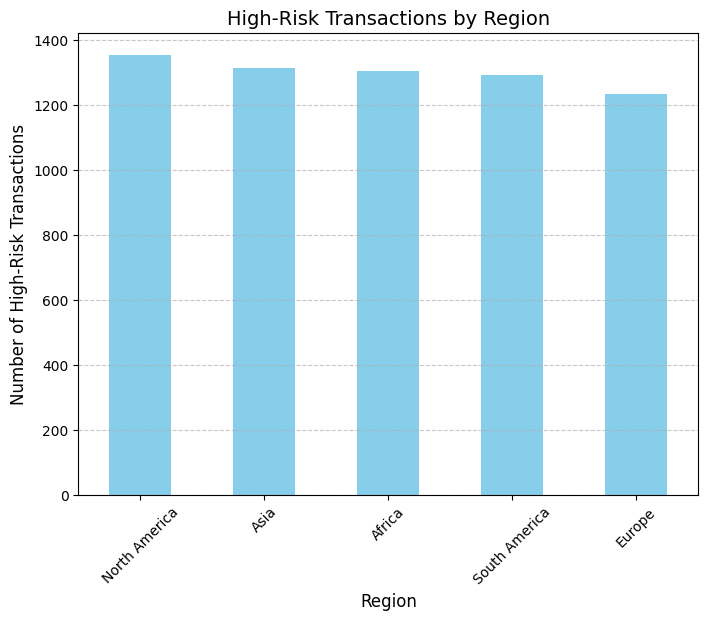

In [22]:
# Regional Distribution Bar Chart
region_distribution.plot(kind="bar", color="skyblue", figsize=(8, 6))
plt.title("High-Risk Transactions by Region", fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of High-Risk Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


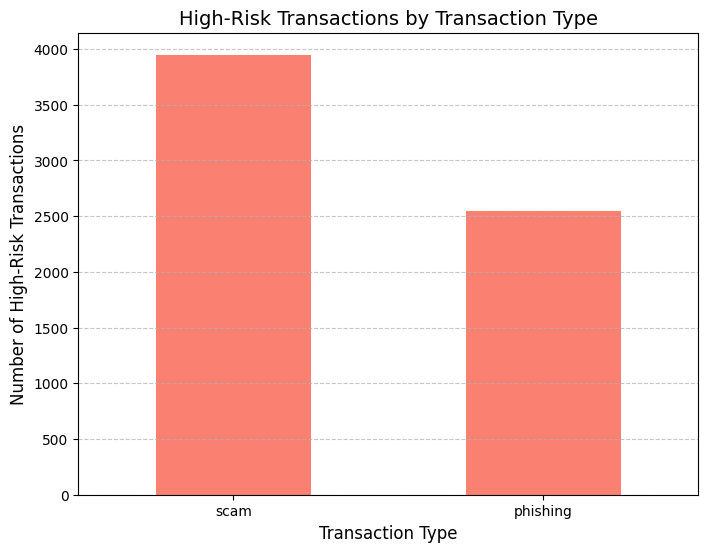

In [23]:
# Transaction Types Bar Chart
transaction_type_distribution.plot(kind='bar', color='salmon', figsize=(8, 6))
plt.title('High-Risk Transactions by Transaction Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of High-Risk Transactions', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


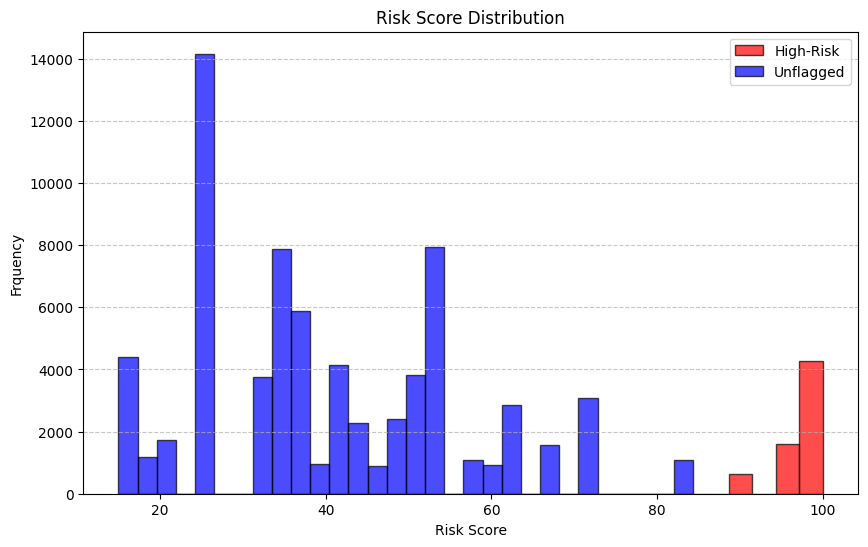

In [24]:
# Plot histograms for risk_score
plt.figure(figsize=(10, 6))
plt.hist(data[data["is_high_risk"] == True]["risk_score"], bins=30, alpha=0.7, label="High-Risk", color="red", edgecolor="black")
plt.hist(data[data["is_high_risk"] == False]["risk_score"], bins=30, alpha=0.7, label="Unflagged", color="blue", edgecolor="black")
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Frquency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

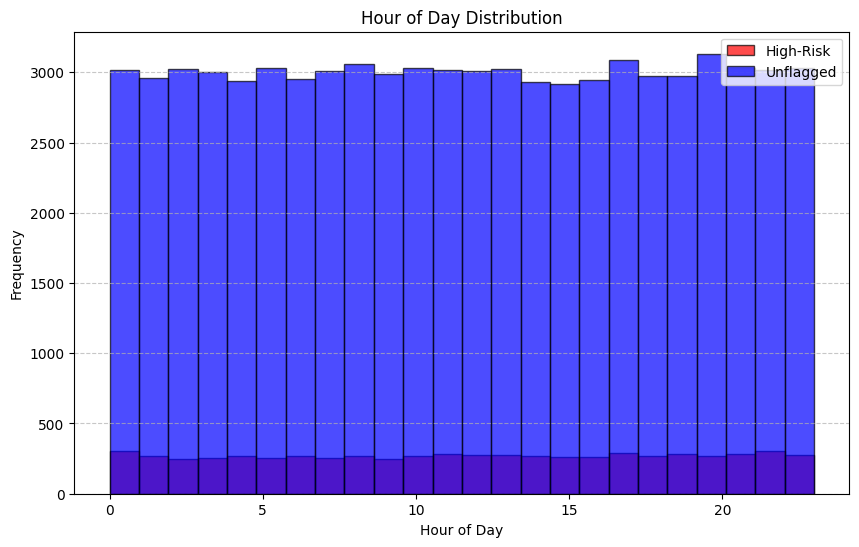

In [25]:
# Plot histograms for hour_of_day
plt.figure(figsize=(10, 6))
plt.hist(data[data['is_high_risk'] == True]['hour_of_day'], bins=24, alpha=0.7, label='High-Risk', color='red', edgecolor="black")
plt.hist(data[data['is_high_risk'] == False]['hour_of_day'], bins=24, alpha=0.7, label='Unflagged', color='blue', edgecolor="black")
plt.title('Hour of Day Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

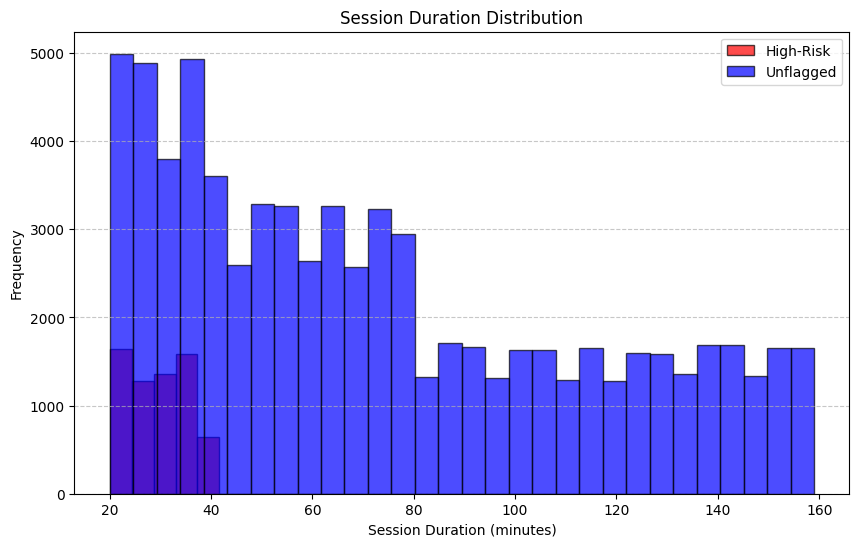

In [26]:
# Plot histograms for session_duration
plt.figure(figsize=(10, 6))
plt.hist(data[data['is_high_risk'] == True]['session_duration'], bins=30, alpha=0.7, label='High-Risk', color='red', edgecolor="black")
plt.hist(data[data['is_high_risk'] == False]['session_duration'], bins=30, alpha=0.7, label='Unflagged', color='blue', edgecolor="black")
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


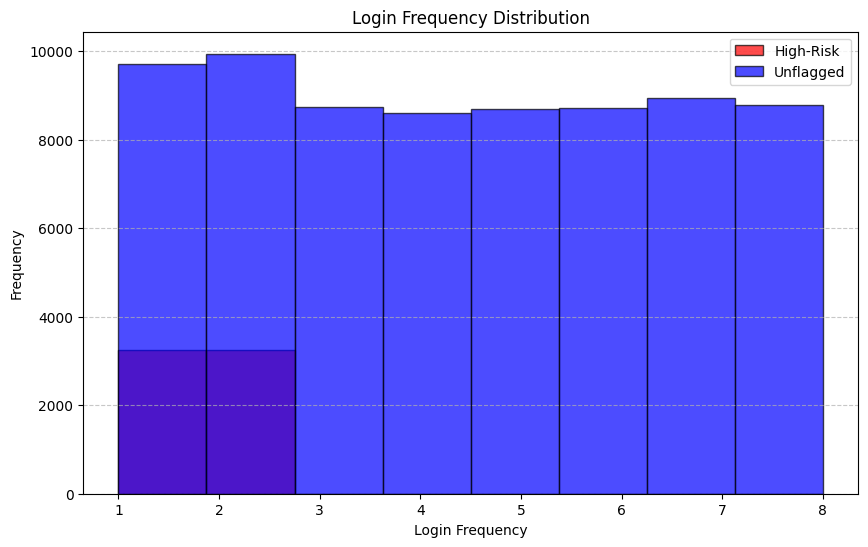

In [27]:
# Plot histograms for login_frequency
plt.figure(figsize=(10, 6))
plt.hist(data[data['is_high_risk'] == True]['login_frequency'], bins=8, alpha=0.7, label='High-Risk', color='red', edgecolor="black")
plt.hist(data[data['is_high_risk'] == False]['login_frequency'], bins=8, alpha=0.7, label='Unflagged', color='blue', edgecolor="black")
plt.title('Login Frequency Distribution')
plt.xlabel('Login Frequency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
data["day_of_week"] = data["timestamp"].dt.day_name()
data["month"] = data["timestamp"].dt.month_name()

print(data[['timestamp', 'day_of_week', 'month']].head())

            timestamp day_of_week     month
0 2022-04-11 12:47:27      Monday     April
1 2022-06-14 19:12:46     Tuesday      June
2 2022-01-18 16:26:59     Tuesday   January
3 2022-06-15 09:20:04   Wednesday      June
4 2022-02-18 14:35:30      Friday  February


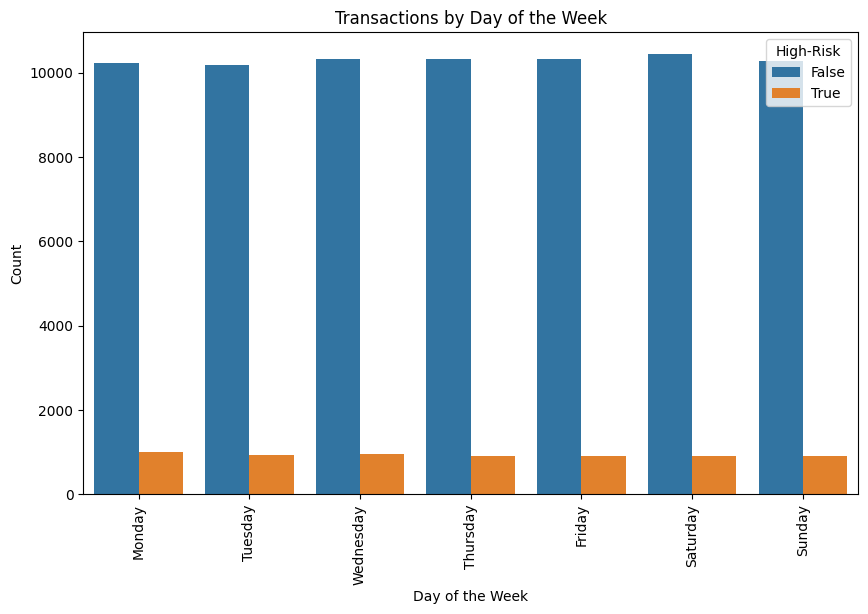

In [29]:
import seaborn as sns

# Plot for day_of_week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="day_of_week", hue="is_high_risk", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="High-Risk")
plt.show()

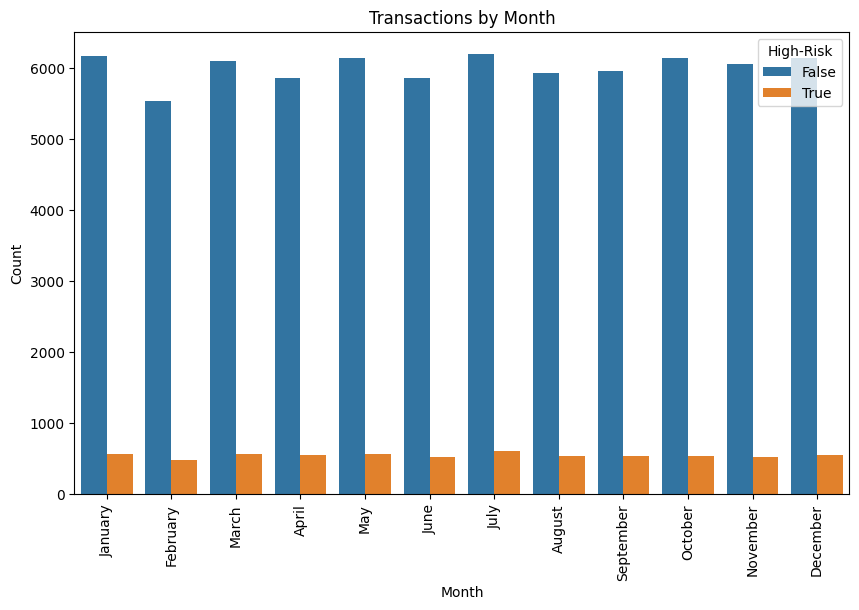

In [30]:
# Plot for month
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="month", hue="is_high_risk", order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.title("Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="High-Risk")
plt.show()


In [31]:
# General metrics
transaction_count_per_user = data.groupby("sending_address")["amount"].count()
average_transaction_amount_per_user = data.groupby("sending_address")["amount"].mean()

# High-risk specific metric
high_risk_transaction_count_per_user = high_risk_outliers.groupby("sending_address")["amount"].count()

# Preview the results
print("\nTransaction Count per User:\n", transaction_count_per_user.head())
print("\nAverage Transaction Amount per User:\n", average_transaction_amount_per_user.head())
print("\nHigh-Risk Transaction Count per User:\n", high_risk_transaction_count_per_user.head())



Transaction Count per User:
 sending_address
0x00262fa3b21847775e2db42965d0192e8dfe5bdc     87
0x002bcd751410a69b3bce463890abb2fcab81a755     29
0x00318c7963a45ceb6b3101e1794ad42137da8f3f     29
0x003ebce509d14e6252dc14c35beb43d2dc52f35c     29
0x004fd71e61d0fb00f974635faec45195b8239607    116
Name: amount, dtype: int64

Average Transaction Amount per User:
 sending_address
0x00262fa3b21847775e2db42965d0192e8dfe5bdc    513.521168
0x002bcd751410a69b3bce463890abb2fcab81a755    557.536861
0x00318c7963a45ceb6b3101e1794ad42137da8f3f    535.293584
0x003ebce509d14e6252dc14c35beb43d2dc52f35c    459.735424
0x004fd71e61d0fb00f974635faec45195b8239607    517.099206
Name: amount, dtype: float64

High-Risk Transaction Count per User:
 sending_address
0x00262fa3b21847775e2db42965d0192e8dfe5bdc    8
0x002bcd751410a69b3bce463890abb2fcab81a755    2
0x00318c7963a45ceb6b3101e1794ad42137da8f3f    2
0x003ebce509d14e6252dc14c35beb43d2dc52f35c    1
0x004fd71e61d0fb00f974635faec45195b8239607    9
Name: amount

In [32]:
# Combine the metrics into a single DataFrame
user_metrics = pd.concat(
    [transaction_count_per_user, average_transaction_amount_per_user, high_risk_transaction_count_per_user],
    axis=1,
    keys=["transaction_count", "average_transaction_amount", "high_risk_transaction_count"]
)

# Calculate the proportion of high-risk transactions
user_metrics["high_risk_proportion"] = user_metrics["high_risk_transaction_count"] / user_metrics["transaction_count"]

print(user_metrics.head())

                                            transaction_count  \
sending_address                                                 
0x00262fa3b21847775e2db42965d0192e8dfe5bdc                 87   
0x002bcd751410a69b3bce463890abb2fcab81a755                 29   
0x00318c7963a45ceb6b3101e1794ad42137da8f3f                 29   
0x003ebce509d14e6252dc14c35beb43d2dc52f35c                 29   
0x004fd71e61d0fb00f974635faec45195b8239607                116   

                                            average_transaction_amount  \
sending_address                                                          
0x00262fa3b21847775e2db42965d0192e8dfe5bdc                  513.521168   
0x002bcd751410a69b3bce463890abb2fcab81a755                  557.536861   
0x00318c7963a45ceb6b3101e1794ad42137da8f3f                  535.293584   
0x003ebce509d14e6252dc14c35beb43d2dc52f35c                  459.735424   
0x004fd71e61d0fb00f974635faec45195b8239607                  517.099206   

                         

In [33]:
high_risk_users = user_metrics[user_metrics["high_risk_proportion"] > 0.1]

print(high_risk_users.head())

                                            transaction_count  \
sending_address                                                 
0x00f47be991d8e476be53b937a627a0a938355f98                 29   
0x029d4cf76f7612557025056f294ad7971318852a                 58   
0x02af9102a2b6e8fc4dbfc65e7d9280f732374fb3                 58   
0x03e096c4505b97a068a538d4ff117292c7f5a147                 58   
0x052db6ddeb63da161f97058c5f016c9c52121caa                 58   

                                            average_transaction_amount  \
sending_address                                                          
0x00f47be991d8e476be53b937a627a0a938355f98                  507.330276   
0x029d4cf76f7612557025056f294ad7971318852a                  508.222385   
0x02af9102a2b6e8fc4dbfc65e7d9280f732374fb3                  541.032673   
0x03e096c4505b97a068a538d4ff117292c7f5a147                  513.866395   
0x052db6ddeb63da161f97058c5f016c9c52121caa                  464.253403   

                         

In [34]:
top_high_risk_users = high_risk_users.sort_values(by="high_risk_proportion", ascending=False).head(10)

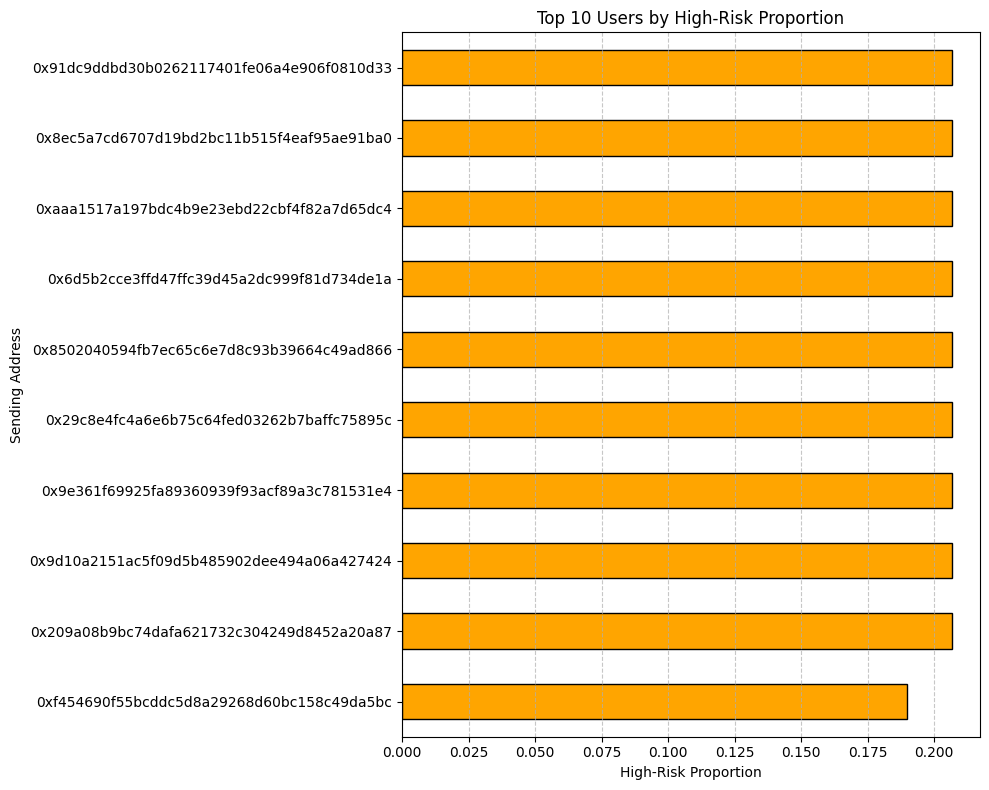

In [35]:
# Horizontal bar chart
plt.figure(figsize=(10, 8))
top_high_risk_users["high_risk_proportion"].sort_values().plot(kind="barh", color="orange", edgecolor="black")

plt.title("Top 10 Users by High-Risk Proportion")
plt.xlabel("High-Risk Proportion")
plt.ylabel("Sending Address")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [36]:
# Export user metrics to a CSV file
user_metrics.to_csv("user_metrics.csv", index=True)
print("User metrics saved to 'user_metrics.csv'")


User metrics saved to 'user_metrics.csv'


In [37]:
# Top 10 high-risk users by high-risk proportion
top_high_risk_addresses = high_risk_users.sort_values(by="high_risk_proportion", ascending=False).head(10).index

# Filter transactions for these users
top_user_transactions = data[data["sending_address"].isin(top_high_risk_addresses)]

# Preview the filtered data
print(top_user_transactions.head())
print(f"Number of transactions: {len(top_user_transactions)}")


              timestamp  hour_of_day  \
298 2022-03-15 19:56:29           19   
374 2022-11-09 04:31:32            4   
502 2022-09-20 15:03:01           15   
579 2022-04-12 12:49:09           12   
765 2022-04-04 05:15:34            5   

                                sending_address  \
298  0x8ec5a7cd6707d19bd2bc11b515f4eaf95ae91ba0   
374  0x91dc9ddbd30b0262117401fe06a4e906f0810d33   
502  0x6d5b2cce3ffd47ffc39d45a2dc999f81d734de1a   
579  0x9d10a2151ac5f09d5b485902dee494a06a427424   
765  0xf454690f55bcddc5d8a29268d60bc158c49da5bc   

                              receiving_address      amount transaction_type  \
298  0x277b36ba56a9b705d63de9d7da8b44bf0fe43a65    0.010000         purchase   
374  0xca36b5b4d2116e36c06b015c91a428485a47861b  561.050592             scam   
502  0xbb2446b93f24e61c733aeb8cff1c82400e412974  475.920939         transfer   
579  0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155  326.570868             sale   
765  0xd9800d4fcd3513d882c2a0302ee10105cb993d22  753

In [38]:
# Count transaction types for the top users
transaction_type_counts = top_user_transactions["transaction_type"].value_counts()

# Print the results
print(transaction_type_counts)


transaction_type
purchase    100
sale         82
transfer     72
scam         41
phishing     24
Name: count, dtype: int64


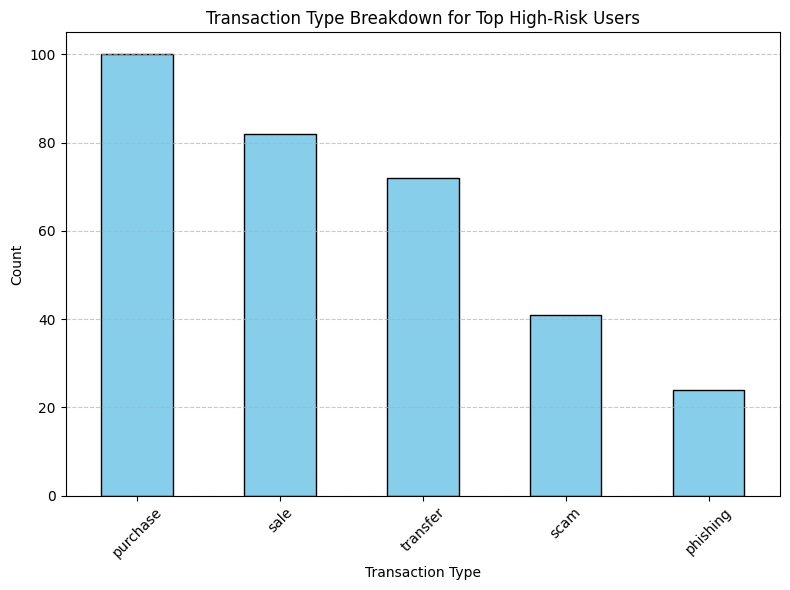

In [39]:
# Bar chart for transaction types
plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Transaction Type Breakdown for Top High-Risk Users")
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
region_counts = top_user_transactions["location_region"].value_counts()

print(region_counts)

location_region
Asia             74
North America    69
Africa           65
South America    60
Europe           51
Name: count, dtype: int64


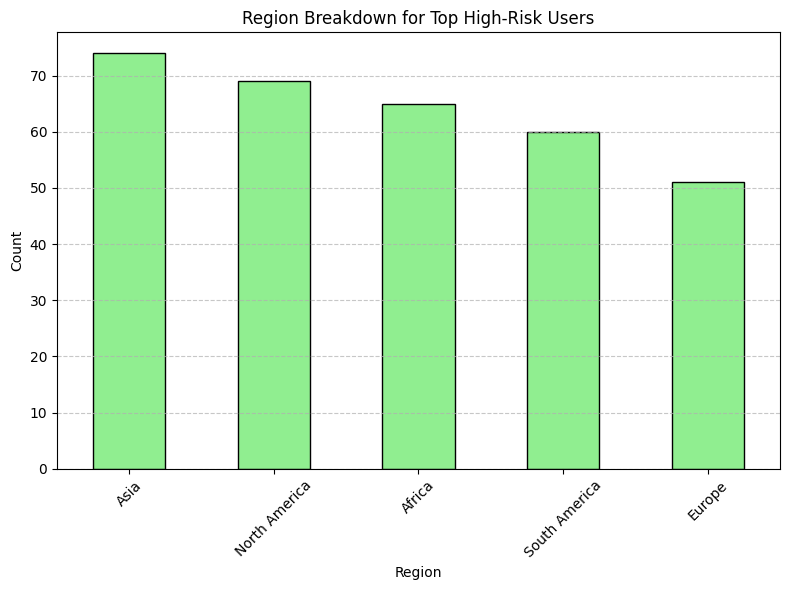

In [41]:
# Bar chart for regions
plt.figure(figsize=(8, 6))
region_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Region Breakdown for Top High-Risk Users")
plt.ylabel("Count")
plt.xlabel("Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
scam_phishing_transactions = top_user_transactions[top_user_transactions["transaction_type"].isin(["scam", "phishing"])]

print(scam_phishing_transactions.head())
print(f"Number of scam and phishing transactions: {len(scam_phishing_transactions)}")

               timestamp  hour_of_day  \
374  2022-11-09 04:31:32            4   
2416 2022-01-29 15:13:51           15   
3475 2022-05-20 09:30:03            9   
5314 2022-10-06 19:46:17           19   
5794 2022-11-24 07:26:33            7   

                                 sending_address  \
374   0x91dc9ddbd30b0262117401fe06a4e906f0810d33   
2416  0x29c8e4fc4a6e6b75c64fed03262b7baffc75895c   
3475  0xf454690f55bcddc5d8a29268d60bc158c49da5bc   
5314  0xaaa1517a197bdc4b9e23ebd22cbf4f82a7d65dc4   
5794  0x91dc9ddbd30b0262117401fe06a4e906f0810d33   

                               receiving_address      amount transaction_type  \
374   0xca36b5b4d2116e36c06b015c91a428485a47861b  561.050592             scam   
2416  0xdc8b9daa7a8f4fc54e642e35b2e677b859592c9a   67.202019         phishing   
3475  0xd9800d4fcd3513d882c2a0302ee10105cb993d22  406.563970             scam   
5314  0xdc3c375ebad13419c6e1c9637582390978326f30  692.855980         phishing   
5794  0xca36b5b4d2116e36c06b015c91a

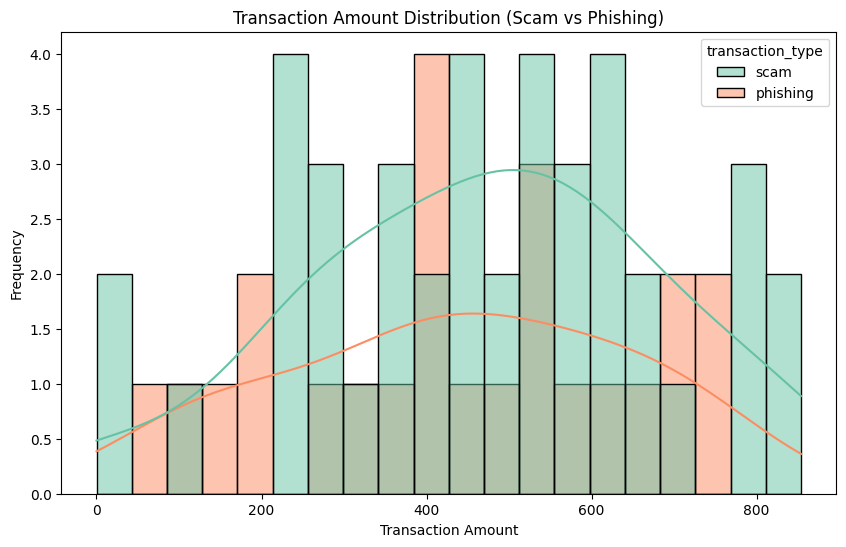

In [43]:
# Plot transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=scam_phishing_transactions, x="amount", hue="transaction_type", kde=True, bins=20, palette="Set2")
plt.title("Transaction Amount Distribution (Scam vs Phishing)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [44]:
# Analyze transaction amounts
print("Transaction Amounts Summary:")
print(scam_phishing_transactions.groupby("transaction_type")["amount"].describe())

# Analyze regions
print("\nRegional Breakdown:")
print(scam_phishing_transactions["location_region"].value_counts())

# Analyze session durations
print("\nSession Duration Summary:")
print(scam_phishing_transactions.groupby("transaction_type")["session_duration"].describe())


Transaction Amounts Summary:
                  count        mean         std        min         25%  \
transaction_type                                                         
phishing           24.0  435.486542  206.311838  67.202019  296.321345   
scam               41.0  467.992158  211.672782   0.010000  319.586838   

                         50%         75%         max  
transaction_type                                      
phishing          422.859877  579.961717  763.070183  
scam              479.131920  618.189786  853.760367  

Regional Breakdown:
location_region
Africa           17
North America    17
Asia             13
South America    10
Europe            8
Name: count, dtype: int64

Session Duration Summary:
                  count       mean       std   min   25%   50%    75%   max
transaction_type                                                           
phishing           24.0  29.583333  6.453288  20.0  24.5  31.0  34.25  39.0
scam               41.0  29.634146  

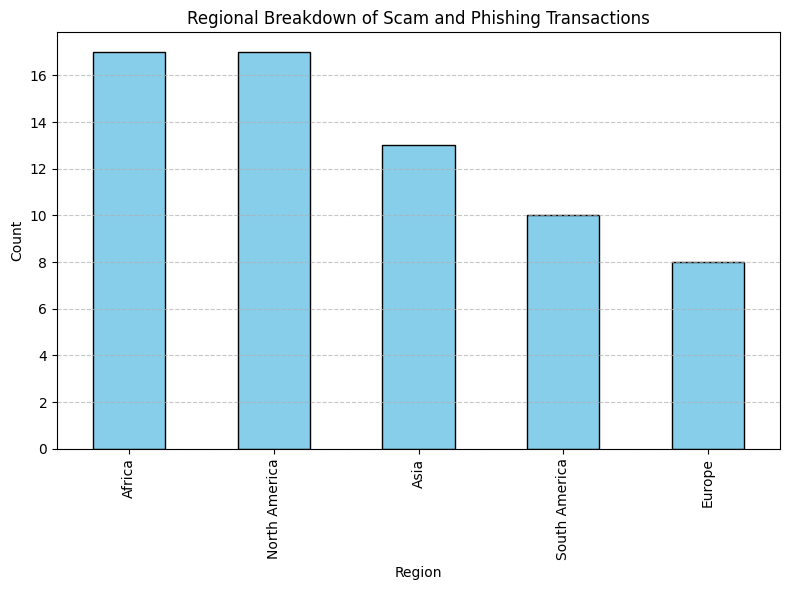

In [45]:
# Bar chart for regional breakdown
plt.figure(figsize=(8, 6))
scam_phishing_transactions["location_region"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Regional Breakdown of Scam and Phishing Transactions")
plt.ylabel("Count")
plt.xlabel("Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

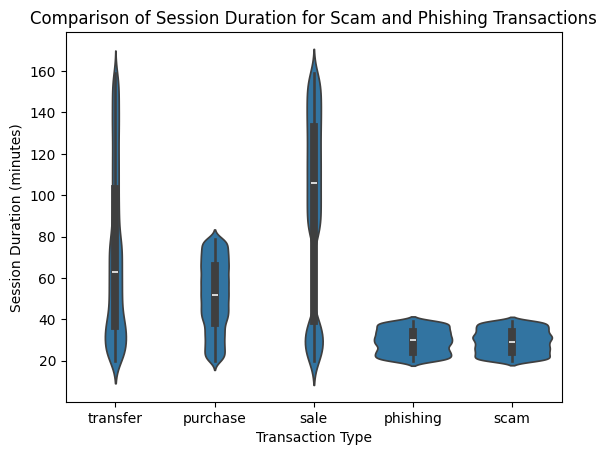

In [46]:
sns.violinplot(x="transaction_type", y="session_duration", data=data)
plt.title("Comparison of Session Duration for Scam and Phishing Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Session Duration (minutes)")
plt.show()


In [47]:
from scipy.stats import shapiro, mannwhitneyu

# Filter the data for scam and phishing transactions
scam_data = data[data["transaction_type"] == "scam"]
phishing_data = data[data["transaction_type"] == "phishing"]

# Normality Test (Shapiro-Wilk Test)
scam_amount_shapiro = shapiro(scam_data["amount"])
phishing_amount_shapiro = shapiro(phishing_data["amount"])

scam_session_shapiro = shapiro(scam_data["session_duration"])
phishing_session_shapiro = shapiro(phishing_data["session_duration"])


print("Shapiro-Wilk Normality Test Results:")
print(f"Scam Amount: W-statistic = {scam_amount_shapiro.statistic}, p-value = {scam_amount_shapiro.pvalue}")
print(f"Phishing Amount: W-statistic = {phishing_amount_shapiro.statistic}, p-value = {phishing_amount_shapiro.pvalue}")
print(f"Scam Session Duration: W-statistic = {scam_session_shapiro.statistic}, p-value = {scam_session_shapiro.pvalue}")
print(f"Phishing Session Duration: W-statistic = {phishing_session_shapiro.statistic}, p-value = {phishing_session_shapiro.pvalue}")

# Non-Parametric Comparison (Mann-Whitney U Test)
# Mann-Whitney U Test for Transaction Amounts
u_stat_amount, p_value_amount = mannwhitneyu(
    scam_data["amount"], phishing_data["amount"], alternative="two-sided"
)

# Mann-Whitney U Test for Session Durations
u_stat_duration, p_value_duration = mannwhitneyu(
    scam_data["session_duration"], phishing_data["session_duration"], alternative="two-sided"
)


print("\nMann-Whitney U Test Results:")
print(f"Transaction Amounts: U-statistic = {u_stat_amount}, p-value = {p_value_amount}")
print(f"Session Durations: U-statistic = {u_stat_duration}, p-value = {p_value_duration}")


Shapiro-Wilk Normality Test Results:
Scam Amount: W-statistic = 0.9941353435946468, p-value = 1.4336317117596669e-11
Phishing Amount: W-statistic = 0.9937187374752202, p-value = 5.481443619921445e-09
Scam Session Duration: W-statistic = 0.951086684094416, p-value = 2.05686394211382e-34
Phishing Session Duration: W-statistic = 0.949938752796014, p-value = 1.210509999776696e-28

Mann-Whitney U Test Results:
Transaction Amounts: U-statistic = 5056363.5, p-value = 0.6913895818701719
Session Durations: U-statistic = 4985813.5, p-value = 0.5754674849915873


In [48]:
data.to_csv("transaction_data.csv", index=False)

In [49]:
file_path = "C:/Users/balla/Downloads/transaction_data.csv"
data1 = pd.read_csv(file_path)

In [50]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
 14  is_high_risk       78600 non-null  int64  
 15  day_of_week        78600 non-null  object 
 16  month              786

In [78]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

# Define features and target variable
features = [
    'amount', 'transaction_type', 'location_region', 'session_duration',
    'login_frequency', 'risk_score', 'hour_of_day', 'day_of_week', 'month'
]
target = 'is_high_risk'

# Create feature and target datasets
X = data1[features]
y = data1[target]


In [69]:
# Preprocessing - OneHotEncoding for categorical data and scaling numerical data
categorical_columns = ['transaction_type', 'location_region', 'day_of_week', 'month']
numerical_columns = ['amount', 'session_duration', 'login_frequency', 'risk_score', 'hour_of_day']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

# Preprocess the features
X_prepared = preprocessor.fit_transform(X)

In [70]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

In [71]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [72]:
# Evaluate the Model
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14467
           1       1.00      1.00      1.00      1253

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720

ROC-AUC Score: 1.00


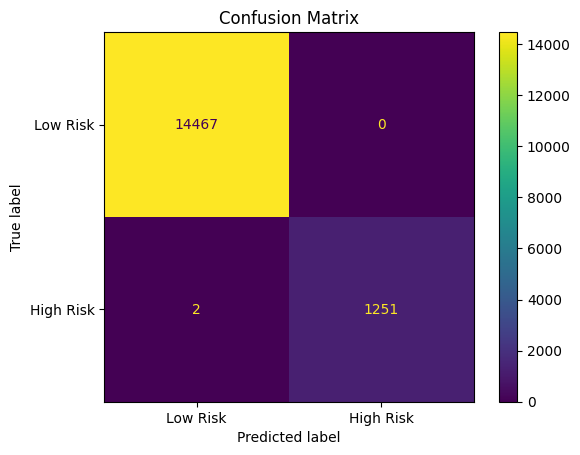

In [79]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.show()

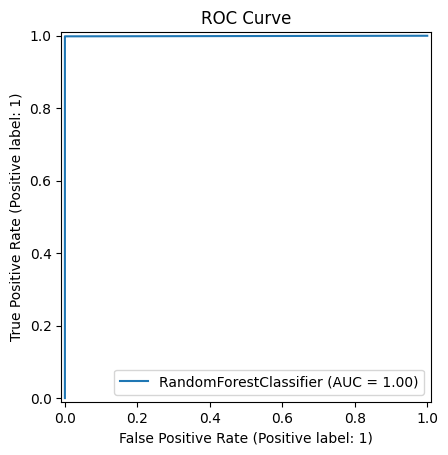

In [80]:
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [73]:
# Feature Importance 
# Extract feature names
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist() + numerical_columns

# Calculate feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
                          Feature  Importance
32                     risk_score    0.434284
3           transaction_type_scam    0.225129
0       transaction_type_phishing    0.162190
30               session_duration    0.045023
31                login_frequency    0.043566
1       transaction_type_purchase    0.029016
4       transaction_type_transfer    0.028496
2           transaction_type_sale    0.027879
29                         amount    0.001531
33                    hour_of_day    0.000813
11             day_of_week_Monday    0.000128
14           day_of_week_Thursday    0.000119
12           day_of_week_Saturday    0.000118
5          location_region_Africa    0.000116
9   location_region_South America    0.000111
8   location_region_North America    0.000106
7          location_region_Europe    0.000103
19                 month_December    0.000100
6            location_region_Asia    0.000099
23                     month_June    0.000098
15           

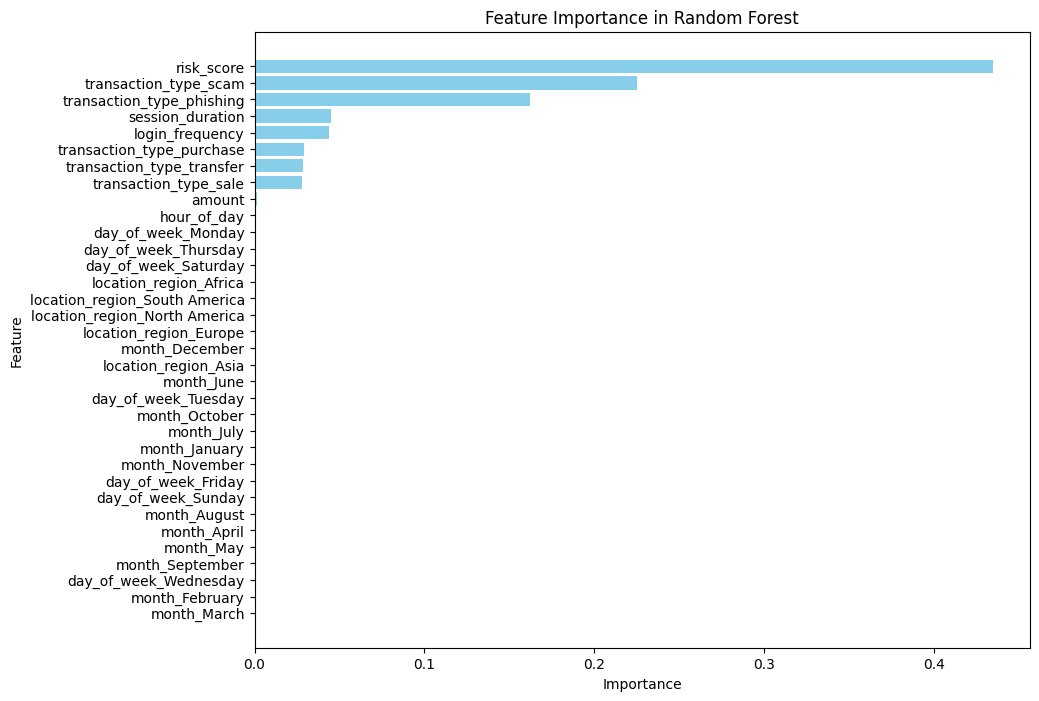

In [75]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [74]:
import pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)

print("Model and preprocessor saved successfully!")

Model and preprocessor saved successfully!
